# Load and prepare the data

In [1]:
import pandas as pd
import os

# List of fiLe paths
file_paths = [
    '../assets/data/AAPL_historical_data.csv',
    '../assets/data/AMZN_historical_data.csv',
    '../assets/data/GOOG_historical_data.csv',
    '../assets/data/MSFT_historical_data.csv',
    '../assets/data/META_historical_data.csv',
    '../assets/data/NVDA_historical_data.csv',
    '../assets/data/TSLA_historical_data.csv'
]

# Initialize an empty list to hold DataFrames
dataframes = []

# Loop through each file and load the data
for file_path in file_paths:
    # Load the current file
    df = pd.read_csv(file_path)
    
    # Ensure the required columns are present
    required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    missing_columns = [col for col in required_columns if col not in df.columns]
    
    if missing_columns:
        raise ValueError(f"Missing columns in {file_path}: {missing_columns}")
    
    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Append the DataFrame to the list
    dataframes.append(df)

# Concatenate all DataFrames into one
combined_data = pd.concat(dataframes, ignore_index=True)

# Drop duplicates if any
combined_data.drop_duplicates(subset=['Date'], inplace=True)

# Sort by Date
combined_data.sort_values(by='Date', inplace=True)

# Reset the index after sorting
combined_data.reset_index(drop=True, inplace=True)

# Display the prepared data
print("Combined Data:")
print(combined_data.head())

# Save the combined data to a new CSV file if needed
combined_data.to_csv('../assets/result_data/combined_stock_data.csv', index=False)


Combined Data:
        Date      Open      High       Low     Close  Adj Close     Volume  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


# Analysis Indicators with TA-Lib for apple

Data with Indicators:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1980-12-12    0.128348    0.128906    0.128348    0.128348    0.098943   
1980-12-15    0.122210    0.122210    0.121652    0.121652    0.093781   
1980-12-16    0.113281    0.113281    0.112723    0.112723    0.086898   
1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089049   
1980-12-18    0.118862    0.119420    0.118862    0.118862    0.091630   
...                ...         ...         ...         ...         ...   
2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

               

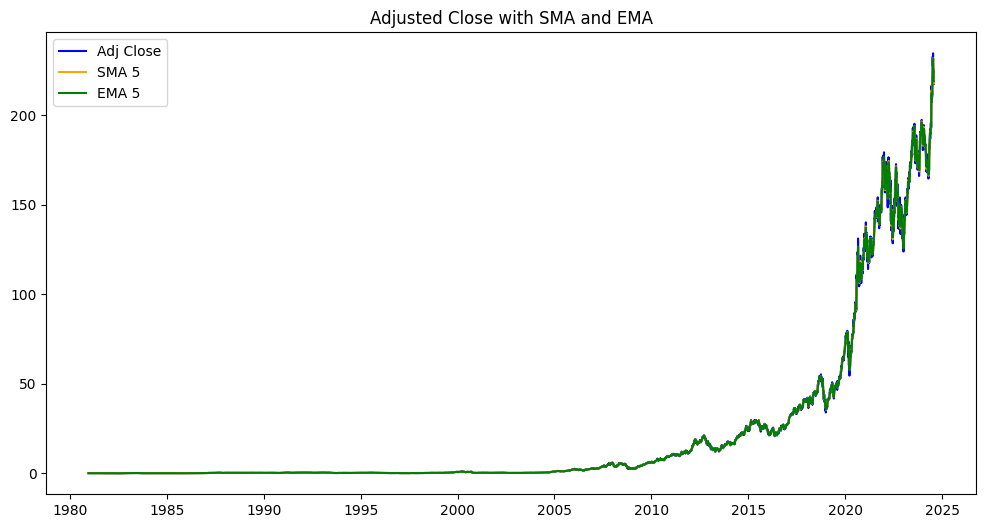

In [2]:
import pandas as pd
import talib
import matplotlib.pyplot as plt


# Load the data from the CSV file located in ../assets/data/
file_path = '../assets/data/AAPL_historical_data.csv'  # Replace with the actual file name
df = pd.read_csv(file_path)


# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Calculate technical indicators using TA-Lib
# Simple Moving Average (SMA)
df['SMA_5'] = talib.SMA(df['Adj Close'], timeperiod=5)

# Exponential Moving Average (EMA)
df['EMA_5'] = talib.EMA(df['Adj Close'], timeperiod=5)

# Relative Strength Index (RSI)
df['RSI_14'] = talib.RSI(df['Adj Close'], timeperiod=14)

# Moving Average Convergence Divergence (MACD)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(
    df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

# Display the resulting DataFrame
print("Data with Indicators:")
print(df)

# Plotting Adj Close and SMA
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='blue')
plt.plot(df.index, df['SMA_5'], label='SMA 5', color='orange')
plt.plot(df.index, df['EMA_5'], label='EMA 5', color='green')
plt.title('Adjusted Close with SMA and EMA')
plt.legend()
plt.show()


# Analysis Indicators with TA-Lib for amazon 

Data with Indicators:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1997-05-15    0.121875    0.125000    0.096354    0.097917    0.097917   
1997-05-16    0.098438    0.098958    0.085417    0.086458    0.086458   
1997-05-19    0.088021    0.088542    0.081250    0.085417    0.085417   
1997-05-20    0.086458    0.087500    0.081771    0.081771    0.081771   
1997-05-21    0.081771    0.082292    0.068750    0.071354    0.071354   
...                ...         ...         ...         ...         ...   
2024-07-24  183.199997  185.449997  180.410004  180.830002  180.830002   
2024-07-25  182.910004  183.899994  176.800003  179.850006  179.850006   
2024-07-26  180.389999  183.190002  180.240005  182.500000  182.500000   
2024-07-29  183.839996  184.750000  182.380005  183.199997  183.199997   
2024-07-30  184.720001  185.860001  179.380005  181.710007  181.710007   

               

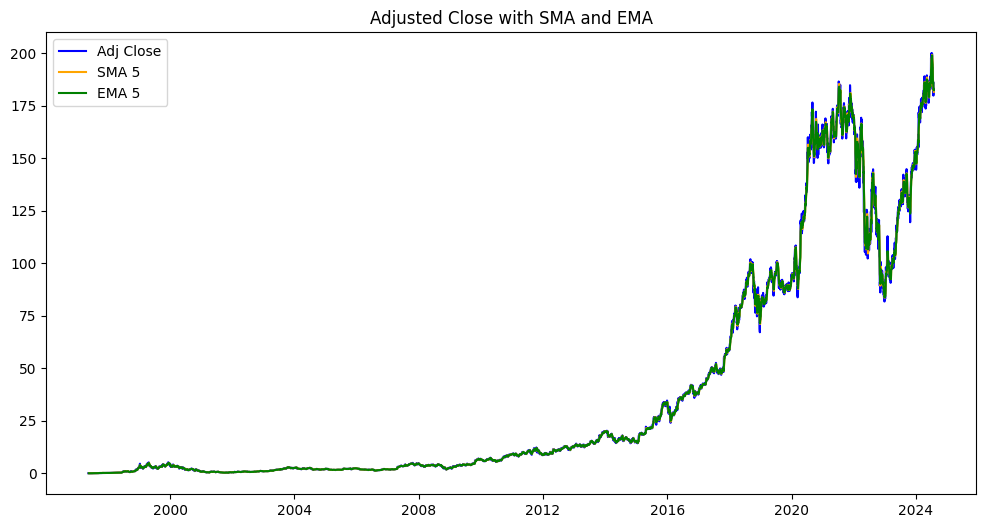

In [4]:
import pandas as pd
import talib
import matplotlib.pyplot as plt


# Load the data from the CSV file located in ../assets/data/
file_path = '../assets/data/AMZN_historical_data.csv'  # Replace with the actual file name
df = pd.read_csv(file_path)


# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Calculate technical indicators using TA-Lib
# Simple Moving Average (SMA)
df['SMA_5'] = talib.SMA(df['Adj Close'], timeperiod=5)

# Exponential Moving Average (EMA)
df['EMA_5'] = talib.EMA(df['Adj Close'], timeperiod=5)

# Relative Strength Index (RSI)
df['RSI_14'] = talib.RSI(df['Adj Close'], timeperiod=14)

# Moving Average Convergence Divergence (MACD)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(
    df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

# Display the resulting DataFrame
print("Data with Indicators:")
print(df)

# Plotting Adj Close and SMA
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='blue')
plt.plot(df.index, df['SMA_5'], label='SMA 5', color='orange')
plt.plot(df.index, df['EMA_5'], label='EMA 5', color='green')
plt.title('Adjusted Close with SMA and EMA')
plt.legend()
plt.show()


# Analysis Indicators with TA-Lib for GOOGLE

Data with Indicators:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2004-08-19    2.490664    2.591785    2.390042    2.499133    2.496292   
2004-08-20    2.515820    2.716817    2.503118    2.697639    2.694573   
2004-08-23    2.758411    2.826406    2.716070    2.724787    2.721690   
2004-08-24    2.770615    2.779581    2.579581    2.611960    2.608991   
2004-08-25    2.614201    2.689918    2.587302    2.640104    2.637103   
...                ...         ...         ...         ...         ...   
2024-07-24  175.389999  177.949997  173.570007  174.369995  174.369995   
2024-07-25  174.250000  175.199997  169.050003  169.160004  169.160004   
2024-07-26  168.770004  169.839996  165.865005  168.679993  168.679993   
2024-07-29  170.500000  172.160004  169.720001  171.130005  171.130005   
2024-07-30  171.830002  172.949997  170.119995  171.860001  171.860001   

               

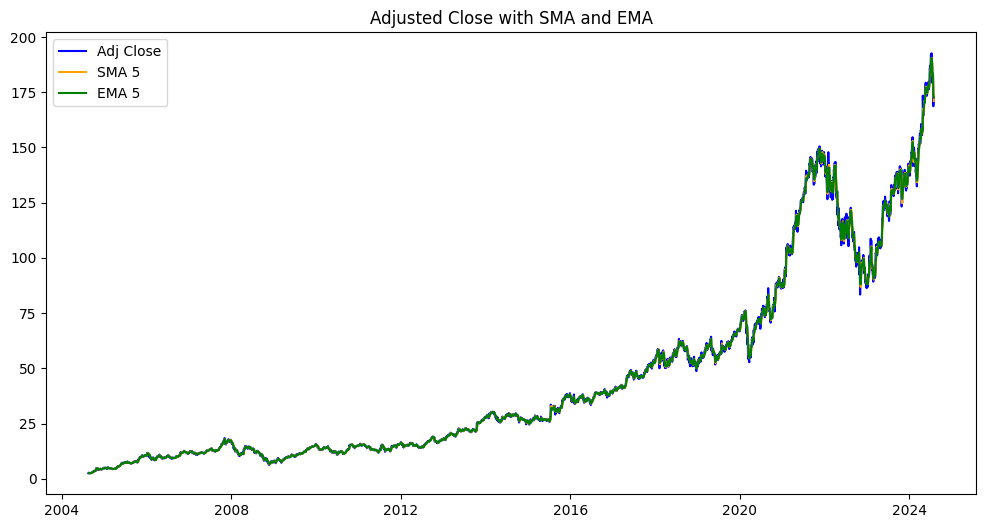

In [5]:
import pandas as pd
import talib
import matplotlib.pyplot as plt


# Load the data from the CSV file located in ../assets/data/
file_path = '../assets/data/GOOG_historical_data.csv'  # Replace with the actual file name
df = pd.read_csv(file_path)


# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Calculate technical indicators using TA-Lib
# Simple Moving Average (SMA)
df['SMA_5'] = talib.SMA(df['Adj Close'], timeperiod=5)

# Exponential Moving Average (EMA)
df['EMA_5'] = talib.EMA(df['Adj Close'], timeperiod=5)

# Relative Strength Index (RSI)
df['RSI_14'] = talib.RSI(df['Adj Close'], timeperiod=14)

# Moving Average Convergence Divergence (MACD)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(
    df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

# Display the resulting DataFrame
print("Data with Indicators:")
print(df)

# Plotting Adj Close and SMA
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='blue')
plt.plot(df.index, df['SMA_5'], label='SMA 5', color='orange')
plt.plot(df.index, df['EMA_5'], label='EMA 5', color='green')
plt.title('Adjusted Close with SMA and EMA')
plt.legend()
plt.show()


# Analysis Indicators with TA-Lib for meta 

Data with Indicators:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-12-12   28.000000   28.139999   27.370001   27.580000   27.523441   
2012-12-13   27.590000   28.750000   27.430000   28.240000   28.182087   
2012-12-14   28.180000   28.330000   26.760000   26.809999   26.755020   
2012-12-17   26.770000   27.000000   26.320000   26.750000   26.695143   
2012-12-18   26.959999   27.910000   26.900000   27.709999   27.653173   
...                ...         ...         ...         ...         ...   
2024-07-24  472.309998  476.299988  460.579987  461.269989  461.269989   
2024-07-25  463.260010  463.549988  442.649994  453.410004  453.410004   
2024-07-26  464.200012  469.769989  459.420013  465.700012  465.700012   
2024-07-29  469.880005  473.959991  465.019989  465.709991  465.709991   
2024-07-30  467.000000  472.730011  456.700012  463.190002  463.190002   

              V

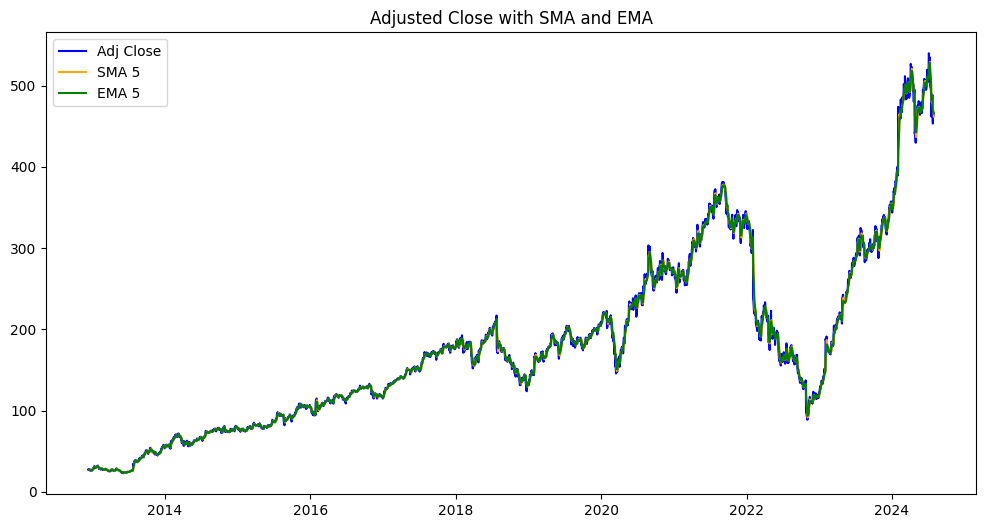

In [6]:
import pandas as pd
import talib
import matplotlib.pyplot as plt


# Load the data from the CSV file located in ../assets/data/
file_path = '../assets/data/META_historical_data.csv'  # Replace with the actual file name
df = pd.read_csv(file_path)


# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Calculate technical indicators using TA-Lib
# Simple Moving Average (SMA)
df['SMA_5'] = talib.SMA(df['Adj Close'], timeperiod=5)

# Exponential Moving Average (EMA)
df['EMA_5'] = talib.EMA(df['Adj Close'], timeperiod=5)

# Relative Strength Index (RSI)
df['RSI_14'] = talib.RSI(df['Adj Close'], timeperiod=14)

# Moving Average Convergence Divergence (MACD)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(
    df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

# Display the resulting DataFrame
print("Data with Indicators:")
print(df)

# Plotting Adj Close and SMA
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='blue')
plt.plot(df.index, df['SMA_5'], label='SMA 5', color='orange')
plt.plot(df.index, df['EMA_5'], label='EMA 5', color='green')
plt.title('Adjusted Close with SMA and EMA')
plt.legend()
plt.show()


# Analysis Indicators with TA-Lib for microsoft

Data with Indicators:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1986-03-13    0.088542    0.101563    0.088542    0.097222    0.059946   
1986-03-14    0.097222    0.102431    0.097222    0.100694    0.062087   
1986-03-17    0.100694    0.103299    0.100694    0.102431    0.063158   
1986-03-18    0.102431    0.103299    0.098958    0.099826    0.061552   
1986-03-19    0.099826    0.100694    0.097222    0.098090    0.060482   
...                ...         ...         ...         ...         ...   
2024-07-24  440.450012  441.480011  427.589996  428.899994  428.128326   
2024-07-25  428.799988  429.799988  417.510010  418.399994  417.647217   
2024-07-26  418.200012  428.920013  417.269989  425.269989  424.504852   
2024-07-29  431.579987  432.149994  424.700012  426.730011  425.962250   
2024-07-30  427.720001  429.049988  417.359985  422.920013  422.159119   

               

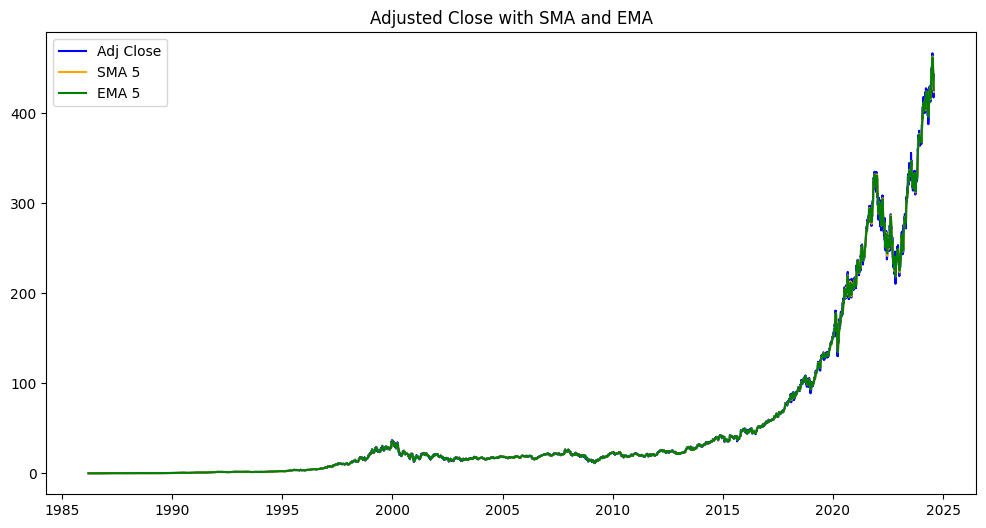

In [7]:
import pandas as pd
import talib
import matplotlib.pyplot as plt


# Load the data from the CSV file located in ../assets/data/
file_path = '../assets/data/MSFT_historical_data.csv'  # Replace with the actual file name
df = pd.read_csv(file_path)


# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Calculate technical indicators using TA-Lib
# Simple Moving Average (SMA)
df['SMA_5'] = talib.SMA(df['Adj Close'], timeperiod=5)

# Exponential Moving Average (EMA)
df['EMA_5'] = talib.EMA(df['Adj Close'], timeperiod=5)

# Relative Strength Index (RSI)
df['RSI_14'] = talib.RSI(df['Adj Close'], timeperiod=14)

# Moving Average Convergence Divergence (MACD)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(
    df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

# Display the resulting DataFrame
print("Data with Indicators:")
print(df)

# Plotting Adj Close and SMA
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='blue')
plt.plot(df.index, df['SMA_5'], label='SMA 5', color='orange')
plt.plot(df.index, df['EMA_5'], label='EMA 5', color='green')
plt.title('Adjusted Close with SMA and EMA')
plt.legend()
plt.show()


# Analysis Indicators with TA-Lib for nividia

Data with Indicators:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-06-29    1.266667    1.666667    1.169333    1.592667    1.592667   
2010-06-30    1.719333    2.028000    1.553333    1.588667    1.588667   
2010-07-01    1.666667    1.728000    1.351333    1.464000    1.464000   
2010-07-02    1.533333    1.540000    1.247333    1.280000    1.280000   
2010-07-06    1.333333    1.333333    1.055333    1.074000    1.074000   
...                ...         ...         ...         ...         ...   
2024-07-24  225.419998  225.990005  214.710007  215.990005  215.990005   
2024-07-25  216.800003  226.000000  216.229996  220.250000  220.250000   
2024-07-26  221.190002  222.279999  215.330002  219.800003  219.800003   
2024-07-29  224.899994  234.270004  224.699997  232.100006  232.100006   
2024-07-30  232.250000  232.410004  220.000000  222.619995  222.619995   

               

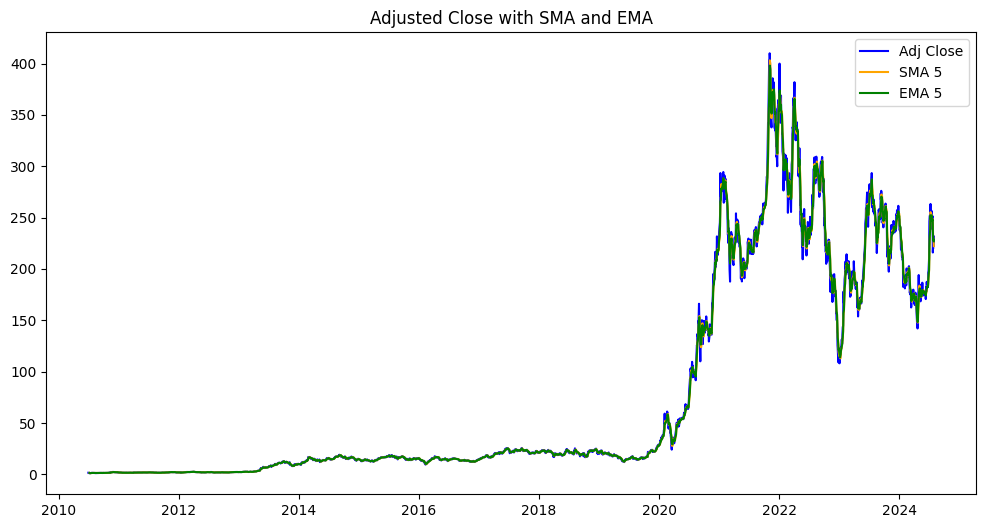

In [8]:
import pandas as pd
import talib
import matplotlib.pyplot as plt


# Load the data from the CSV file located in ../assets/data/
file_path = '../assets/data/TSLA_historical_data.csv'  # Replace with the actual file name
df = pd.read_csv(file_path)


# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Calculate technical indicators using TA-Lib
# Simple Moving Average (SMA)
df['SMA_5'] = talib.SMA(df['Adj Close'], timeperiod=5)

# Exponential Moving Average (EMA)
df['EMA_5'] = talib.EMA(df['Adj Close'], timeperiod=5)

# Relative Strength Index (RSI)
df['RSI_14'] = talib.RSI(df['Adj Close'], timeperiod=14)

# Moving Average Convergence Divergence (MACD)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(
    df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

# Display the resulting DataFrame
print("Data with Indicators:")
print(df)

# Plotting Adj Close and SMA
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='blue')
plt.plot(df.index, df['SMA_5'], label='SMA 5', color='orange')
plt.plot(df.index, df['EMA_5'], label='EMA 5', color='green')
plt.title('Adjusted Close with SMA and EMA')
plt.legend()
plt.show()


# PyNance for Financial Metrics

In [9]:
import pandas as pd
import yfinance as yf

# List of file paths
file_paths = [
    '../assets/data/AAPL_historical_data.csv',
    '../assets/data/AMZN_historical_data.csv',
    '../assets/data/GOOG_historical_data.csv',
    '../assets/data/MSFT_historical_data.csv',
    '../assets/data/META_historical_data.csv',
    '../assets/data/NVDA_historical_data.csv',
    '../assets/data/TSLA_historical_data.csv'
]

# Initialize an empty list to hold DataFrames
dataframes = []

# Loop through each file and load the data
for file_path in file_paths:
    # Load the current file
    df = pd.read_csv(file_path)
    
    # Assuming the ticker name is part of the filename (e.g., 'AAPL')
    ticker = file_path.split('_')[0].split('/')[-1]  # Extract ticker from filename
    
    # Add a 'Ticker' column to each DataFrame
    df['Ticker'] = ticker
    
    # Append to the list of DataFrames
    dataframes.append(df)

# Combine all DataFrames into a single DataFrame
combined_data = pd.concat(dataframes, ignore_index=True)

# Convert the 'Date' column to datetime
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

# Now use yfinance to calculate the financial metrics for each ticker
for ticker in combined_data['Ticker'].unique():
    print(f"Calculating metrics for {ticker}")
    
    # Fetch stock data using yfinance
    stock = yf.Ticker(ticker)
    
    # Get historical stock data for the last year
    stock_data = stock.history(period="1y")  # Adjust period if needed
    
    # Calculate Simple Moving Average (SMA) and Exponential Moving Average (EMA)
    stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['EMA_50'] = stock_data['Close'].ewm(span=50, adjust=False).mean()
    
    # Calculate daily returns
    stock_data['Returns'] = stock_data['Close'].pct_change()
    
    # Calculate volatility (50-day rolling standard deviation of returns)
    stock_data['Volatility'] = stock_data['Returns'].rolling(window=50).std()
    
    # Get the P/E ratio
    pe_ratio = stock.info.get('trailingPE', None)  # Get P/E ratio from stock info
    print(f"{ticker} P/E Ratio: {pe_ratio}")
    
    # Merge the calculated metrics back to the combined data
    combined_data.loc[combined_data['Ticker'] == ticker, 'SMA_50'] = stock_data['SMA_50']
    combined_data.loc[combined_data['Ticker'] == ticker, 'EMA_50'] = stock_data['EMA_50']
    combined_data.loc[combined_data['Ticker'] == ticker, 'Returns'] = stock_data['Returns']
    combined_data.loc[combined_data['Ticker'] == ticker, 'Volatility'] = stock_data['Volatility']

# Print the combined data with the added metrics
print(combined_data.tail())


Calculating metrics for AAPL
AAPL P/E Ratio: 41.289474
Calculating metrics for AMZN
AMZN P/E Ratio: 49.771366
Calculating metrics for GOOG
GOOG P/E Ratio: 26.246357
Calculating metrics for MSFT
MSFT P/E Ratio: 37.321487
Calculating metrics for META
META P/E Ratio: 29.500944
Calculating metrics for NVDA
NVDA P/E Ratio: 52.173912
Calculating metrics for TSLA
TSLA P/E Ratio: 126.508194
            Date        Open        High         Low       Close   Adj Close  \
45423 2024-07-24  225.419998  225.990005  214.710007  215.990005  215.990005   
45424 2024-07-25  216.800003  226.000000  216.229996  220.250000  220.250000   
45425 2024-07-26  221.190002  222.279999  215.330002  219.800003  219.800003   
45426 2024-07-29  224.899994  234.270004  224.699997  232.100006  232.100006   
45427 2024-07-30  232.250000  232.410004  220.000000  222.619995  222.619995   

          Volume  Dividends  Stock Splits Ticker  SMA_50  EMA_50  Returns  \
45423  167942900        0.0           0.0   TSLA     NaN

# visualization 

/tmp/ipykernel_83627/2389957517.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


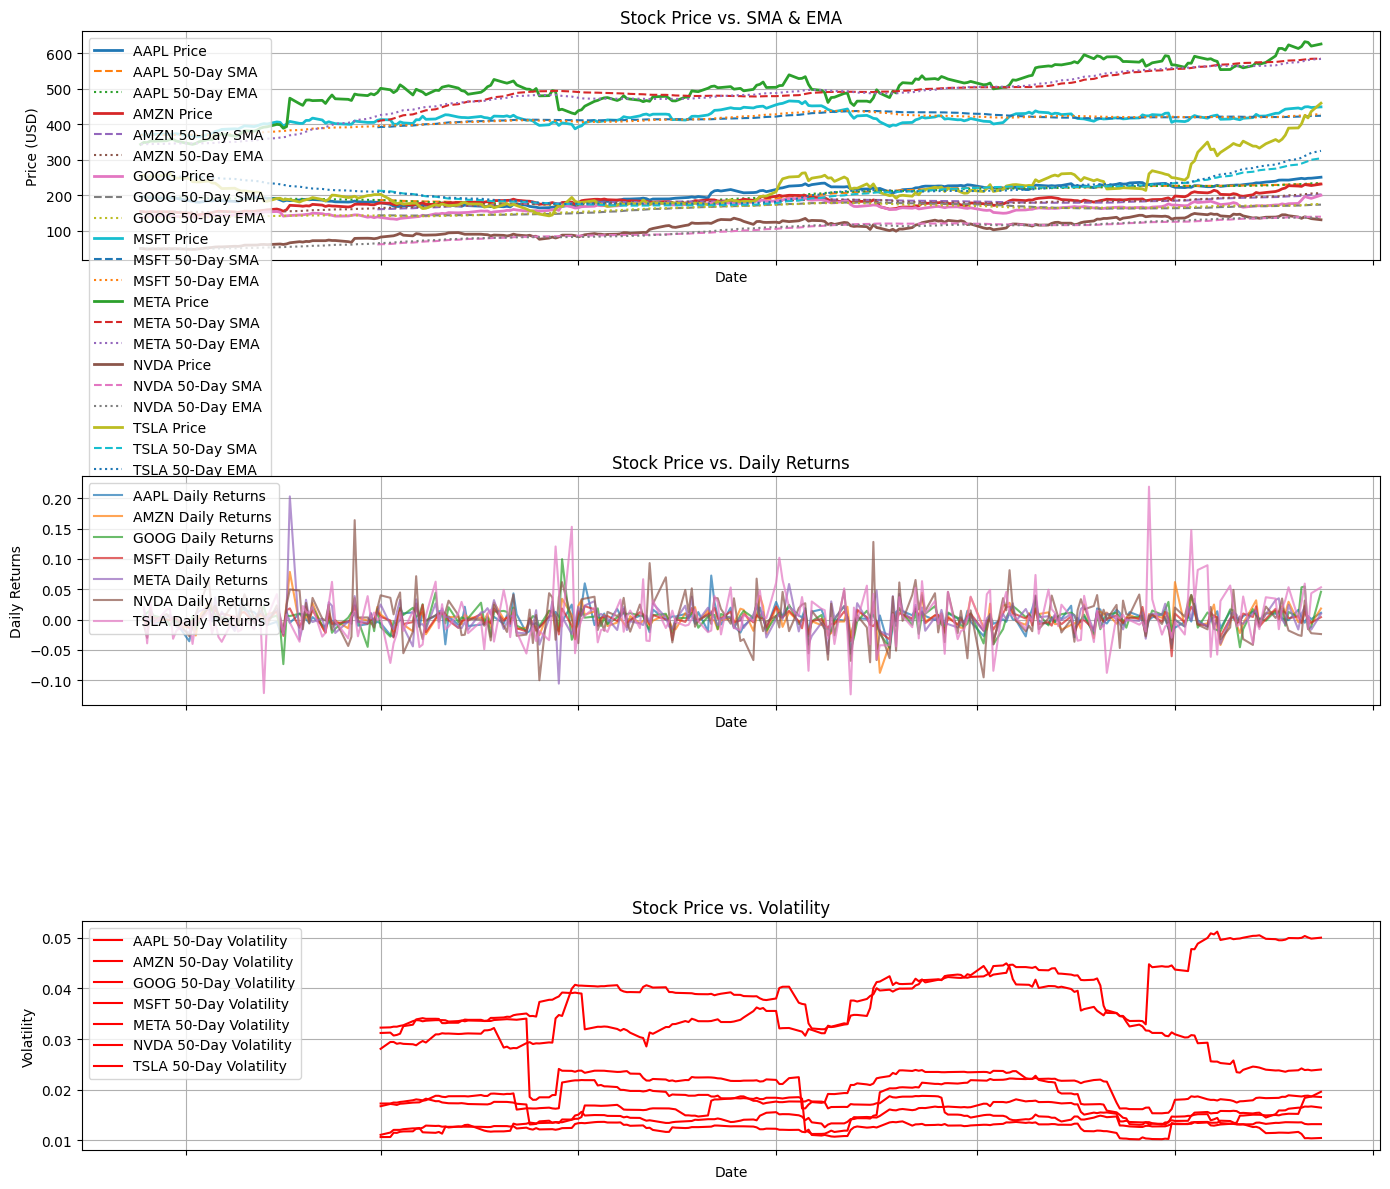

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Let's assume `combined_data` is already loaded from your previous code

# Initialize a figure for the subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Iterate through each unique ticker in the combined data
for ticker in combined_data['Ticker'].unique():
    # Fetch stock data using yfinance
    stock = yf.Ticker(ticker)
    stock_data = stock.history(period="1y")  # Adjust period if needed
    
    # Calculate Simple Moving Average (SMA) and Exponential Moving Average (EMA)
    stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['EMA_50'] = stock_data['Close'].ewm(span=50, adjust=False).mean()
    
    # Plot: Stock Price vs. SMA & EMA
    axes[0].plot(stock_data.index, stock_data['Close'], label=f'{ticker} Price', linewidth=2)
    axes[0].plot(stock_data.index, stock_data['SMA_50'], label=f'{ticker} 50-Day SMA', linestyle='--')
    axes[0].plot(stock_data.index, stock_data['EMA_50'], label=f'{ticker} 50-Day EMA', linestyle=':')
    
    # Calculate daily returns and plot: Stock Price vs. Returns
    stock_data['Returns'] = stock_data['Close'].pct_change()
    axes[1].plot(stock_data.index, stock_data['Returns'], label=f'{ticker} Daily Returns', linestyle='-', alpha=0.7)
    
    # Calculate volatility: Rolling standard deviation of returns (50-day)
    stock_data['Volatility'] = stock_data['Returns'].rolling(window=50).std()
    axes[2].plot(stock_data.index, stock_data['Volatility'], label=f'{ticker} 50-Day Volatility', color='red')

# Set titles and labels for the plots
axes[0].set_title('Stock Price vs. SMA & EMA')
axes[0].set_ylabel('Price (USD)')
axes[0].legend(loc='upper left')

axes[1].set_title('Stock Price vs. Daily Returns')
axes[1].set_ylabel('Daily Returns')
axes[1].legend(loc='upper left')

axes[2].set_title('Stock Price vs. Volatility')
axes[2].set_ylabel('Volatility')
axes[2].legend(loc='upper left')

# Format the x-axis labels and add grid lines
for ax in axes:
    ax.grid(True)
    ax.set_xlabel('Date')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Display the plot
plt.tight_layout()
plt.show()
